In [20]:
# Load data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data from folder glass+identification
data = pd.read_csv('glass+identification/glass.data', header=None)

# Assign column names
data.columns = [
    "ID", "Refractive Ray Curvature", "Elemental Ratio: Sodium", "Elemental Ratio: Magnesium", 
    "Elemental Ratio: Aluminum", "Elemental Ratio: Silicon", "Elemental Ratio: Potassium", 
    "Elemental Ratio: Calcium", "Elemental Ratio: Barium", "Elemental Ratio: Iron", "Artifact Type"
]
# Drop the 'Id' column
data = data.drop(columns=['ID'])

# Label the artifact type
artifact_labels = {
    1: "Ancient relic fragment (Type A)",
    2: "Ancient relic fragment (Type B)",
    3: "Modern forged piece (Type C)",
    4: "Decorative glass container (Type D)",
    5: "Ritualistic shard (Type E)",
    6: "Unknown anomaly (Type F)",
    7: "Experimental alloy (Type G)"
}

data["Artifact Type"] = data["Artifact Type"].map(artifact_labels)

# Partially hide labels (40-50%)
mask_percentage = np.random.uniform(0.4, 0.5)
mask_indices = np.random.choice(data.index, size=int(len(data) * mask_percentage), replace=False)
data.loc[mask_indices, "Artifact Type"] = "Mysterious Fragment"

# Save transformed dataset
data.to_csv('mysterious_artifact_dataset.csv', index=False)

# Display sample of transformed data
print(data.head())


   Refractive Ray Curvature  Elemental Ratio: Sodium  \
0                   1.52101                    13.64   
1                   1.51761                    13.89   
2                   1.51618                    13.53   
3                   1.51766                    13.21   
4                   1.51742                    13.27   

   Elemental Ratio: Magnesium  Elemental Ratio: Aluminum  \
0                        4.49                       1.10   
1                        3.60                       1.36   
2                        3.55                       1.54   
3                        3.69                       1.29   
4                        3.62                       1.24   

   Elemental Ratio: Silicon  Elemental Ratio: Potassium  \
0                     71.78                        0.06   
1                     72.73                        0.48   
2                     72.99                        0.39   
3                     72.61                        0.57   
4      

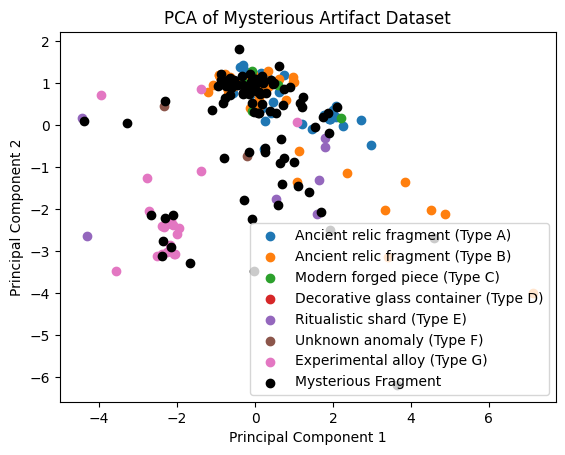

In [21]:
# Reduce dimensions using PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
data = data.reset_index(drop=True)

# Standardize the data
features = data.drop(columns=["Artifact Type"])
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
# Apply PCA
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)
# Plot the PCA results including mysterious fragments
plt.figure()
for label in artifact_labels.values():
    subset = data[data["Artifact Type"] == label]
    plt.scatter(features_pca[subset.index, 0], features_pca[subset.index, 1], label=label)

# Plot mysterious fragments
mysterious_subset = data[data["Artifact Type"] == "Mysterious Fragment"]
plt.scatter(features_pca[mysterious_subset.index, 0], features_pca[mysterious_subset.index, 1], color='black', label='Mysterious Fragment')

plt.title("PCA of Mysterious Artifact Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()



In [22]:
# Train model not considering hidden label rows
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
# Prepare data for training
X = features_scaled
y = data["Artifact Type"]
# Disconsider rows with hidden labels
mask = y != "Mysterious Fragment"
X = X[mask]
y = y[mask]
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
# Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
# Make predictions
y_pred = model.predict(X_test)
# Evaluate the model
print(classification_report(y_test, y_pred))


                                 precision    recall  f1-score   support

Ancient relic fragment (Type A)       1.00      0.80      0.89         5
Ancient relic fragment (Type B)       1.00      1.00      1.00         5
    Experimental alloy (Type G)       1.00      1.00      1.00         2
   Modern forged piece (Type C)       0.50      1.00      0.67         1

                       accuracy                           0.92        13
                      macro avg       0.88      0.95      0.89        13
                   weighted avg       0.96      0.92      0.93        13



In [23]:
# Predict the hidden labels
hidden_X = features_scaled[mask_indices]
hidden_predictions = model.predict(hidden_X)
# Add predictions to the dataset
data.loc[mask_indices, "Artifact Type"] = hidden_predictions
# Save the final dataset with predictions
data.to_csv('final_mysterious_artifact_dataset.csv', index=False)
# Display the final dataset
print(data.head())

   Refractive Ray Curvature  Elemental Ratio: Sodium  \
0                   1.52101                    13.64   
1                   1.51761                    13.89   
2                   1.51618                    13.53   
3                   1.51766                    13.21   
4                   1.51742                    13.27   

   Elemental Ratio: Magnesium  Elemental Ratio: Aluminum  \
0                        4.49                       1.10   
1                        3.60                       1.36   
2                        3.55                       1.54   
3                        3.69                       1.29   
4                        3.62                       1.24   

   Elemental Ratio: Silicon  Elemental Ratio: Potassium  \
0                     71.78                        0.06   
1                     72.73                        0.48   
2                     72.99                        0.39   
3                     72.61                        0.57   
4      

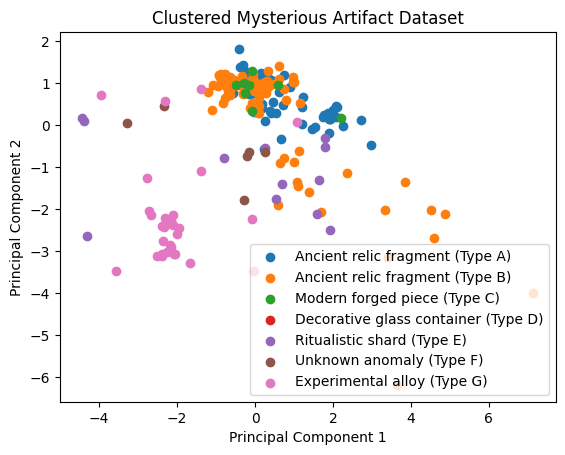

In [24]:
# Display clustered data
plt.figure()
for label in artifact_labels.values():
    subset = data[data["Artifact Type"] == label]
    plt.scatter(features_pca[subset.index, 0], features_pca[subset.index, 1], label=label)
    plt.title("Clustered Mysterious Artifact Dataset")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
plt.legend()
plt.show()